In [60]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import urllib
from pathlib import Path
import pandas as pd

In [2]:
def annotate_image(image_file, xy):
    im = Image.open(image_file)
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    for XY in xy:
        cat = XY[1]
        XY = XY[0]

        x1 = XY[0]
        width = XY[2]
        y1 = XY[1]
        height = XY[3]

        rect = patches.Rectangle([x1, y1], width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        ax.text(x1, y1+16, all_categories.loc[cat]["name"], color="yellow", bbox=dict(facecolor='red', alpha=0.2))
    plt.axis('off')
    plt.savefig("bboxes/"+image_file, bbox_inches="tight", pad_inches=0)
    plt.show()

In [28]:
with open('annotations/instances_val2014.json') as f:
    data = json.load(f)

In [29]:
data['annotations'][72]

{'segmentation': [[316.36,
   189.6,
   333.09,
   169.96,
   345.45,
   158.32,
   356.36,
   153.23,
   365.82,
   157.6,
   378.18,
   159.05,
   389.82,
   168.51,
   395.64,
   179.41,
   414.55,
   196.87,
   416.0,
   208.51,
   425.45,
   218.69,
   439.27,
   225.96,
   446.55,
   236.87,
   465.45,
   249.23,
   487.27,
   271.78,
   509.82,
   288.51,
   528.0,
   300.87,
   542.55,
   313.96,
   543.27,
   320.51,
   506.18,
   353.23,
   416.73,
   354.69,
   396.36,
   354.69,
   368.73,
   353.23,
   353.45,
   353.23,
   330.18,
   353.96,
   325.09,
   353.23,
   320.73,
   355.41,
   330.91,
   338.69,
   322.91,
   329.23,
   314.91,
   308.87,
   301.82,
   304.51,
   283.64,
   307.41,
   265.45,
   317.6,
   256.73,
   316.87,
   244.36,
   306.69,
   247.27,
   301.6,
   266.18,
   293.6,
   286.55,
   281.23,
   309.82,
   279.78,
   322.18,
   281.96,
   330.91,
   289.23,
   323.64,
   281.96,
   328.73,
   272.51,
   331.64,
   268.14,
   325.09,
   263.78,
 

In [30]:
len(data['images']), len(data['annotations'])

(40504, 291875)

In [31]:
data['annotations'][72]

{'segmentation': [[316.36,
   189.6,
   333.09,
   169.96,
   345.45,
   158.32,
   356.36,
   153.23,
   365.82,
   157.6,
   378.18,
   159.05,
   389.82,
   168.51,
   395.64,
   179.41,
   414.55,
   196.87,
   416.0,
   208.51,
   425.45,
   218.69,
   439.27,
   225.96,
   446.55,
   236.87,
   465.45,
   249.23,
   487.27,
   271.78,
   509.82,
   288.51,
   528.0,
   300.87,
   542.55,
   313.96,
   543.27,
   320.51,
   506.18,
   353.23,
   416.73,
   354.69,
   396.36,
   354.69,
   368.73,
   353.23,
   353.45,
   353.23,
   330.18,
   353.96,
   325.09,
   353.23,
   320.73,
   355.41,
   330.91,
   338.69,
   322.91,
   329.23,
   314.91,
   308.87,
   301.82,
   304.51,
   283.64,
   307.41,
   265.45,
   317.6,
   256.73,
   316.87,
   244.36,
   306.69,
   247.27,
   301.6,
   266.18,
   293.6,
   286.55,
   281.23,
   309.82,
   279.78,
   322.18,
   281.96,
   330.91,
   289.23,
   323.64,
   281.96,
   328.73,
   272.51,
   331.64,
   268.14,
   325.09,
   263.78,
 

In [32]:
all_images = []
for x in data['annotations']:
    if x["category_id"]==72:
        all_images.append(x["image_id"])

In [33]:
len(all_images)

2057

In [34]:
all_images = {}
for img in data["images"]:
    if img["id"] in all_images:
        all_images[img["id"]] = img
# for tvs in all_images:


In [35]:
len(all_images)

0

In [36]:
data["images"][0]

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [37]:
bboxes = {}
## category = {}

for item in data['annotations']:
    if item["image_id"] not in bboxes:
        bboxes[item["image_id"]] = []
    bboxes[item["image_id"]].append([item["bbox"], item["category_id"]])

In [38]:
len(bboxes[558840]), bboxes[558840]

(11,
 [[[199.84, 200.46, 77.71, 70.88], 58],
  [[325.27, 104.38, 33.67, 105.99], 44],
  [[168.85, 90.98, 31.42, 88.73], 44],
  [[1.92, 87.91, 34.95, 175.35], 47],
  [[346.58, 1.07, 292.01, 343.71], 1],
  [[239.08, 42.72, 19.88, 76.73], 44],
  [[409.93, 215.42, 71.84, 50.12], 50],
  [[0.96, 1.02, 93.08, 160.25], 1],
  [[276.39, 13.81, 31.75, 61.57], 44],
  [[3.33, 263.96, 359.34, 156.39], 67],
  [[413.54, 201.9, 72.79, 56.38], 50]])

In [39]:
all_categories = pd.DataFrame(data['categories']).set_index("id")
all_categories.loc[72]["name"]

'tv'

In [40]:
#TV = all_categories[all_categories["name"]=="tv"]

In [41]:
# print (TV)

In [42]:
bboxes[558840]

[[[199.84, 200.46, 77.71, 70.88], 58],
 [[325.27, 104.38, 33.67, 105.99], 44],
 [[168.85, 90.98, 31.42, 88.73], 44],
 [[1.92, 87.91, 34.95, 175.35], 47],
 [[346.58, 1.07, 292.01, 343.71], 1],
 [[239.08, 42.72, 19.88, 76.73], 44],
 [[409.93, 215.42, 71.84, 50.12], 50],
 [[0.96, 1.02, 93.08, 160.25], 1],
 [[276.39, 13.81, 31.75, 61.57], 44],
 [[3.33, 263.96, 359.34, 156.39], 67],
 [[413.54, 201.9, 72.79, 56.38], 50]]

In [43]:
all_images = []

for image in data['images']:
    
    # for every image in the "images" key, we will extarct "coco_url" and add it to a "new_dictionary"
    new_dictionary = {}
    new_dictionary["coco_url"] = image["coco_url"]
    image_id = int(image["id"])
    
    if image_id in bboxes:
        
        # Add the "bboxes" for the "image_id" to the "new_dictionary"
        new_dictionary["bboxes"] = bboxes[image_id]
        
        # add the image path to the "new_dictionary" by spliting the image url and take the last index in the splitted list
        new_dictionary["image_path"] = "images/" + new_dictionary["coco_url"].split("/")[-1]
        
        # Append the "new_dictionary" to "all_images" list
        all_images.append(new_dictionary)

In [44]:
len(all_images)

40137

In [45]:
all_images[0]

{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'bboxes': [[[359.17, 146.17, 112.45, 213.57], 4],
  [[339.88, 22.16, 153.88, 300.73], 1],
  [[471.64, 172.82, 35.92, 48.1], 1],
  [[486.01, 183.31, 30.63, 34.98], 2]],
 'image_path': 'images/COCO_val2014_000000391895.jpg'}

In [46]:
downloaded_images = []
counter = 0
for img in all_images:
    if counter >= 10:
        break
    counter +=1
    image_url = img["coco_url"]
    download = urllib.request.URLopener()
    if not Path(img["image_path"]).is_file():
        print("Downloading... " + img["image_path"])
        download.retrieve(image_url, img["image_path"])
    downloaded_images.append(img)


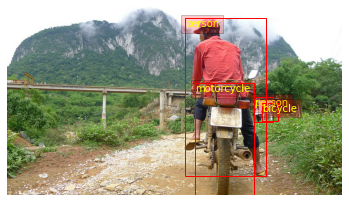

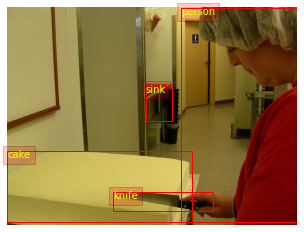

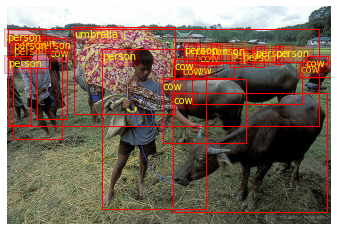

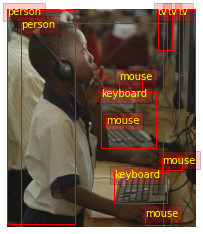

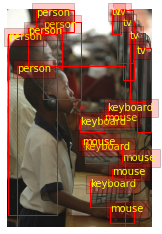

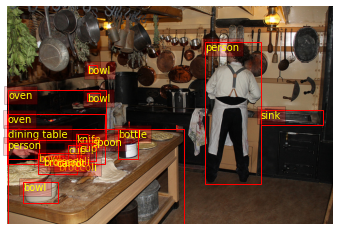

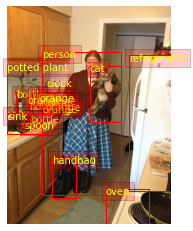

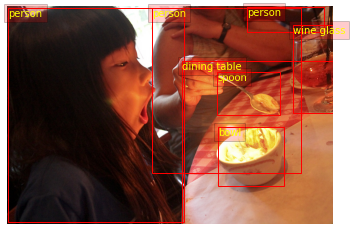

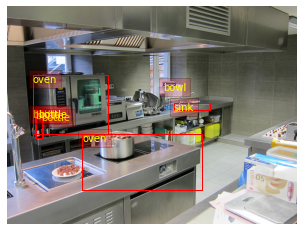

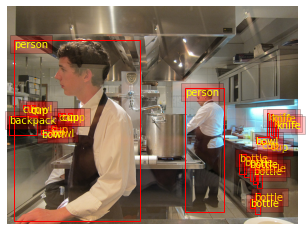

In [47]:
for x in downloaded_images:
    annotate_image(x["image_path"], x["bboxes"])

In [48]:
data.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [64]:
import pandas as pd
images = pd.DataFrame(data['images'])
annotations = pd.DataFrame(data['annotations'])
categories = pd.DataFrame(data['categories'])


In [65]:
images2 = {}
for item in data['images']:
    images2[item["id"]] = 72

In [66]:
print (images2)

{391895: 72, 522418: 72, 184613: 72, 318219: 72, 554625: 72, 397133: 72, 574769: 72, 60623: 72, 309022: 72, 5802: 72, 222564: 72, 118113: 72, 193271: 72, 224736: 72, 483108: 72, 403013: 72, 374628: 72, 328757: 72, 384213: 72, 293802: 72, 86408: 72, 37777: 72, 372938: 72, 386164: 72, 223648: 72, 204805: 72, 113588: 72, 384553: 72, 337264: 72, 368402: 72, 12448: 72, 252219: 72, 79841: 72, 87038: 72, 174482: 72, 515289: 72, 562150: 72, 542145: 72, 412151: 72, 403385: 72, 579003: 72, 540186: 72, 242611: 72, 51191: 72, 269105: 72, 294832: 72, 462565: 72, 144941: 72, 173350: 72, 60760: 72, 324266: 72, 166532: 72, 262284: 72, 360772: 72, 6818: 72, 191381: 72, 111076: 72, 340559: 72, 258985: 72, 509822: 72, 321107: 72, 229643: 72, 125059: 72, 455483: 72, 436141: 72, 129001: 72, 232262: 72, 61181: 72, 166323: 72, 580041: 72, 326781: 72, 387362: 72, 138079: 72, 556616: 72, 472621: 72, 192440: 72, 86320: 72, 256668: 72, 383445: 72, 565797: 72, 81922: 72, 50125: 72, 364521: 72, 394892: 72, 1146: 7

In [67]:
for x in downloaded_tv_images:
    annotate_image(x["image_path"], x["bboxes"])

In [68]:
type(images)

pandas.core.frame.DataFrame

In [69]:
display(categories.head(5))
display(images.head(5))
display(annotations.head(5))

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane


,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,3,COCO_val2014_000000391895.jpg,http://images.cocodataset.org/val2014/COCO_val...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
1,4,COCO_val2014_000000522418.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
2,3,COCO_val2014_000000184613.jpg,http://images.cocodataset.org/val2014/COCO_val...,336,500,2013-11-14 12:36:29,http://farm3.staticflickr.com/2169/2118578392_...,184613
3,3,COCO_val2014_000000318219.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,556,2013-11-14 13:02:53,http://farm5.staticflickr.com/4125/5094763076_...,318219
4,3,COCO_val2014_000000554625.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625


,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156
1,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509
2,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402....",5607.66135,0,200365,"[239.48, 347.87, 160.0, 57.81]",58,603
3,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388....",0.00000,0,200365,"[296.65, 388.33, 1.03, 0.0]",58,918
4,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335....",800.41325,0,200365,"[251.87, 333.42, 125.94, 22.71]",58,1072


In [70]:
merged_df = pd.merge(annotations, images, how="left", left_on="image_id", right_on="id")

In [71]:
merged_df2 = pd.merge(merged_df, categories, how="left", left_on="category_id", right_on="id")

In [72]:
merged_df2.head(2)

,segmentation,area,iscrowd,image_id,bbox,category_id,id_x,license,file_name,coco_url,height,width,date_captured,flickr_url,id_y,supercategory,id,name
0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156,1,COCO_val2014_000000558840.jpg,http://images.cocodataset.org/val2014/COCO_val...,427,640,2013-11-15 06:55:40,http://farm5.staticflickr.com/4045/4488509035_...,558840,food,58,hot dog
1,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509,3,COCO_val2014_000000200365.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-15 00:04:50,http://farm2.staticflickr.com/1177/1162747961_...,200365,food,58,hot dog


In [73]:
merged_df.dtypes

segmentation      object
area             float64
iscrowd            int64
image_id           int64
bbox              object
category_id        int64
id_x               int64
license            int64
file_name         object
coco_url          object
height             int64
width              int64
date_captured     object
flickr_url        object
id_y               int64
dtype: object